In [1]:
import tensorflow as tf
from tensorflow import  keras
tf.__version__ 

'2.1.0'

In [2]:
from tensorflow.keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
print(train_labels) #multilabels

[ 3  4  3 ... 25  3 25]


In [6]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.  #第 i 篇的哪個字有出現
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))  #把所有元素設為 0
    for i, label in enumerate(labels):
        results[i, label] = 1.   #第 i 個元素設為 1
    return results

one_hot_train_labels = to_one_hot(train_labels)  #向量化訓練標籤
one_hot_test_labels = to_one_hot(test_labels)  #向量化測試標籤

In [11]:
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(10000,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
])

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
x_val[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
partial_x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
history=model.fit(partial_x_train,
                  partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 374us/sample - loss: 2.5105 - accuracy: 0.5411 - val_loss: 1.6700 - val_accuracy: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 105us/sample - loss: 1.3671 - accuracy: 0.7087 - val_loss: 1.2840 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 109us/sample - loss: 1.0199 - accuracy: 0.7771 - val_loss: 1.1177 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 105us/sample - loss: 0.8027 - accuracy: 0.8274 - val_loss: 1.0211 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 99us/sample - loss: 0.6421 - accuracy: 0.8639 - val_loss: 0.9646 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 103us/sample - loss: 0.5119 - accuracy: 0.8941 - val_loss: 0.9243 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 98us/s

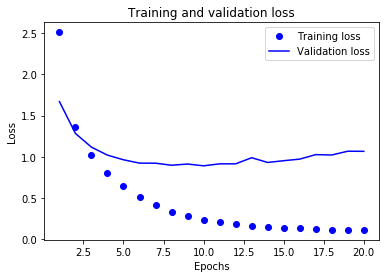

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

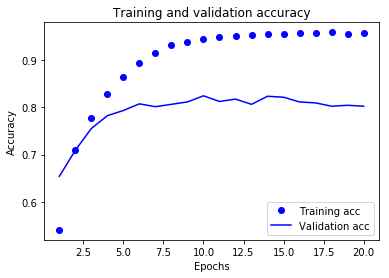

In [19]:
plt.clf()  #先清除畫面

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(10000,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                 epochs=9,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 185us/sample - loss: 2.6090 - accuracy: 0.5401 - val_loss: 1.7306 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 102us/sample - loss: 1.3974 - accuracy: 0.7112 - val_loss: 1.2936 - val_accuracy: 0.7180
Epoch 3/9
7982/7982 [==============================] - 1s 97us/sample - loss: 1.0336 - accuracy: 0.7811 - val_loss: 1.1430 - val_accuracy: 0.7470
Epoch 4/9
7982/7982 [==============================] - 1s 97us/sample - loss: 0.8123 - accuracy: 0.8307 - val_loss: 1.0238 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 99us/sample - loss: 0.6474 - accuracy: 0.8631 - val_loss: 0.9452 - val_accuracy: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 99us/sample - loss: 0.5155 - accuracy: 0.8934 - val_loss: 0.9107 - val_accuracy: 0.8260
Epoch 7/9
7982/7982 [==============================] - 1s 101us/sample - l

In [21]:
model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 224us/sample - loss: 0.9733 - accuracy: 0.7894


[0.9733387485531325, 0.7894034]

In [22]:
prediction=model.predict(x_test)

In [23]:
prediction[0]

array([6.14933742e-05, 1.55845759e-04, 2.02805477e-05, 8.34348619e-01,
       1.47220582e-01, 5.46625743e-05, 1.26811952e-04, 1.23079386e-04,
       2.37103412e-03, 6.84451588e-05, 4.02678503e-04, 1.50189968e-03,
       2.40022462e-04, 6.06215268e-04, 5.79507614e-05, 1.02428734e-04,
       5.20822767e-04, 1.91916188e-04, 7.80264309e-05, 6.57853903e-03,
       1.63661677e-03, 5.91354037e-04, 3.01677119e-05, 1.06994575e-03,
       7.15972828e-06, 3.44122855e-05, 1.03573773e-04, 1.06948664e-05,
       1.26360945e-04, 3.61735933e-04, 9.25835047e-05, 1.05094659e-05,
       2.67268570e-05, 9.23540028e-06, 1.77356720e-04, 6.27115442e-05,
       5.22538430e-05, 1.88305694e-05, 1.44256501e-05, 3.66275810e-04,
       1.49939879e-04, 1.66904647e-04, 1.65834226e-05, 1.53506226e-05,
       4.80110771e-07, 1.63042714e-05], dtype=float32)

In [24]:
prediction[0].shape

(46,)

In [25]:
np.sum(prediction[0])

0.9999999

In [26]:
np.argmax(prediction[0]) #最大數值(機率)就是該類別

3

In [27]:
y_val[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])